Name: Kagan Hamzacebi

ID: 151101064

Course: BIL470

In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dt import DecisionTreeClassifier

# Import Data

 * Read Dataset
 * Perform EDA

## Read Dataset

In [69]:
#import data
visData = pd.read_csv('iris.csv')
visData

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Summary

In [70]:
visData.groupby('species').agg(['min', 'max', 'mean', 'median'])

sepal_length                    sepal_width                     \
                    min  max   mean median         min  max   mean median   
species                                                                     
setosa              4.3  5.8  5.006    5.0         2.3  4.4  3.418    3.4   
versicolor          4.9  7.0  5.936    5.9         2.0  3.4  2.770    2.8   
virginica           4.9  7.9  6.588    6.5         2.2  3.8  2.974    3.0   

           petal_length                    petal_width                     
                    min  max   mean median         min  max   mean median  
species                                                                    
setosa              1.0  1.9  1.464   1.50         0.1  0.6  0.244    0.2  
versicolor          3.0  5.1  4.260   4.35         1.0  1.8  1.326    1.3  
virginica           4.5  6.9  5.552   5.55         1.4  2.5  2.026    2.0

In [71]:
visData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
visData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Pair Plots

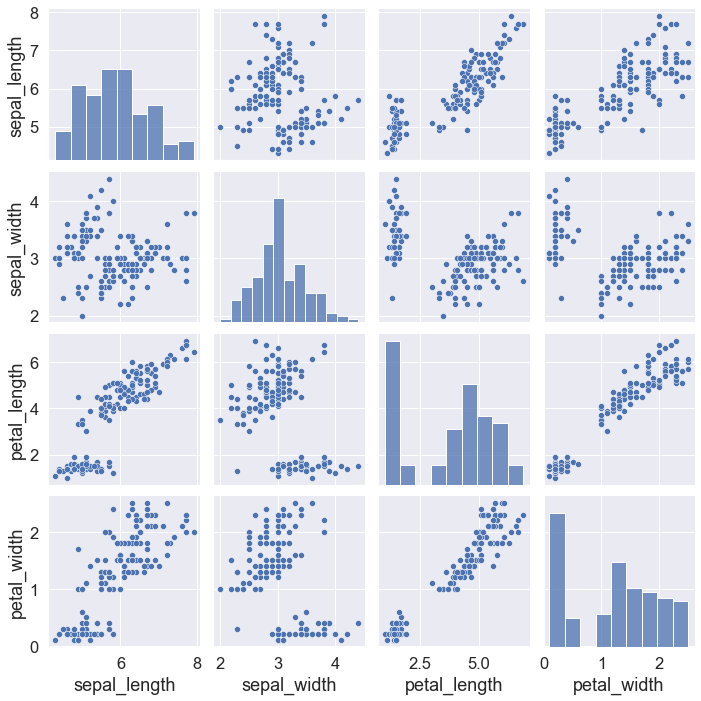

In [73]:
sns.pairplot(visData)

## Boxplot

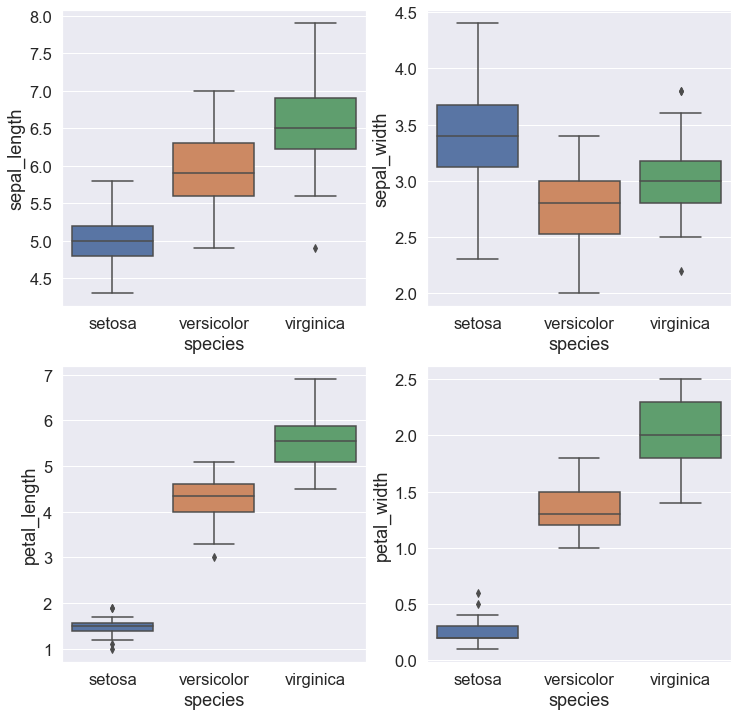

In [74]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=visData)
plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal_width', data=visData)
plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal_length', data=visData)
plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal_width', data=visData)

plt.show()

## Violin Plot

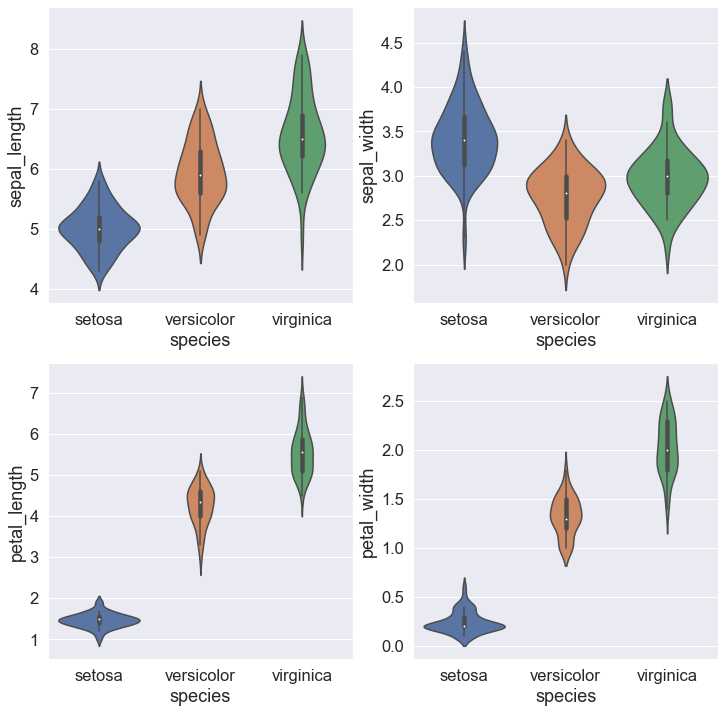

In [75]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=visData)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=visData)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=visData)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=visData)

plt.show()

## Heatmap For Features

[]

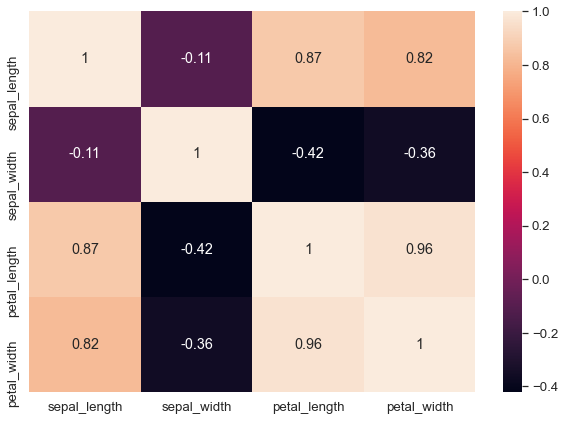

In [76]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(visData.corr(), annot=True)
plt.plot()

## Create X, y Lists

In [77]:
import random

data = pd.DataFrame(visData)

#build train sets
X = list()
y = list()

#fetch features and label
for line in data.iterrows():
    val = list(line[1])
    X.append(list(val[:4]))
    y.append(val[-1])

#assign label values as Setosa=0 Versicolor=1 Virginica=2
for i in range(len(y)):
    if y[i] == "setosa":
        y[i] = 0
    elif y[i] == "versicolor":
        y[i] = 1
    else:
        y[i] = 2

#shuffle X,y with same order
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)

#Train data 0-120 Test data 120-150 -- 80% used for Train
X_train, X_test, y_train, y_test = X[:120], X[120:], y[:120], y[120:]

# Train the classifier

 * train the classifier
 * calculate metrics


In [78]:
#train
from dt import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Results

 * Accuracy
 * Precision
 * Recall
 * F1-Score

Since the train (80%) and test (20%) datas are getting shuffled the result might differ between 90% and 100% after each run.

In [79]:
predictions = clf.predict(X_test)

def getAccuracy(y_test, predictions):
    t = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            t = t + 1

    print('Accuracy: ' + str(format(t / len(y_test) * 100, '.1f')) + '%')

def getConfMatrixData(y_test, predictions, label=3):
    data = list()

    for lb in range(label):
        TP = 0
        TN = 0
        FP = 0
        FN = 0

        for i in range(len(predictions)):
            if predictions[i] == lb and predictions[i] == y_test[i]:
                TP = TP + 1
            if predictions[i] is not lb and y_test[i] is not lb:
                TN = TN + 1
            if predictions[i] == lb and y_test[i] is not lb:
                FP = FP + 1
            if predictions[i] is not lb and y_test[i] == lb:
                FN = FN + 1

        data.append([TP,TN,FP,FN])
    return data

def getMetrics(y_test, predictions):
    metrics = getConfMatrixData(y_test, predictions)
    print('\nSpecies     Precision     Recall     F1-Score')
    print('---------------------------------------------')

    classCount = 3
    
    for i in range(classCount):
        val = metrics[i]

        precision = val[0] / (val[0] + val[2])
        recall = val[0] / (val[0] + val[3])
        f1 = 2 * ((precision * recall) / (precision + recall))
        
        falsePositiveRate = val[3] / (val[3] + val[0])

        if i == 0:
            print('Setosa:     ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))
        elif i == 1:
            print('Versicolor: ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))
        else:
            print('Virginica:  ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))

getAccuracy(y_test, predictions)
getMetrics(y_test, predictions)


Accuracy: 93.3%

Species     Precision     Recall     F1-Score
---------------------------------------------
Setosa:     1.000         1.000      1.000
Versicolor: 1.000         0.875      0.933
Virginica:  0.778         1.000      0.875


## Output Confusion Matrix

[[7, 23, 0, 0], [14, 14, 0, 2], [7, 21, 2, 0]]


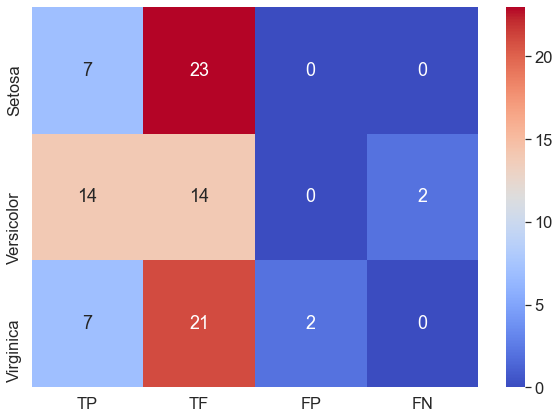

In [80]:
metrics = getConfMatrixData(y_test, predictions)
print(metrics)
cm = pd.DataFrame(metrics, range(3), range(4))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, xticklabels=['TP', 'TF', 'FP', 'FN'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap="coolwarm")

plt.show()

## ROC Curve & AUC

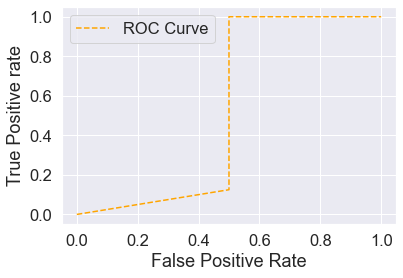

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')  

plt.show()